# Time Series Preliminary Modeling

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import pickle

pd.set_option('display.max_columns', None)

In [2]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Select Building to Model

In [3]:
with open('berkeley_clean4.pkl','rb') as read_file:
    berkeley_df = pickle.load(read_file)

In [7]:
building_list = berkeley_df.building_id.unique()
building_list

array([565, 567, 568, 569, 570, 571, 573, 574, 575, 576, 577, 580, 582,
       583, 584, 585, 586, 587, 588, 589, 592, 594, 595, 597, 598, 599,
       600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612,
       614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 626, 627,
       628, 630, 631, 632, 633, 634, 635, 636, 637, 638, 640, 641, 642,
       643, 644, 645, 646, 649, 652, 653, 654, 655])

In [9]:
# Split dataframe by the 74 buidlings.

def building_df_separator(full_df, building_no):
    
    building_df = full_df[full_df['building_id'] == building_no]
        
    return building_df

In [10]:
berkeley_clean_dict = {}

for i in building_list:
    berkeley_clean_dict[i] = building_df_separator(berkeley_df, i)

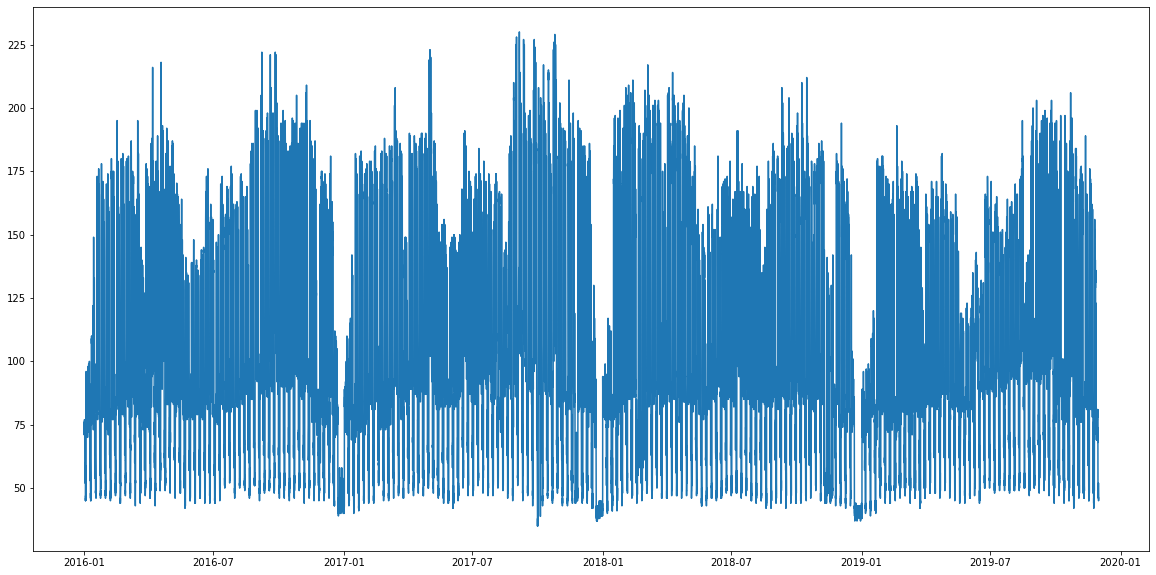

In [12]:
plt.figure(figsize=(20,10))

plt.plot(berkeley_clean_dict[580]['timestamp'], berkeley_clean_dict[580]['meter_reading_scraped'])

#### Building 580 will be used

In [13]:
berkeley580 = berkeley_df[berkeley_df['building_id'] == 580]

In [14]:
berkeley580

,building_id,timestamp,Date,Year,Season,Month,Day,Hour,meter_reading_scraped
377520,580,2016-01-01 00:00:00,2016-01-01,2016,Winter,1,1,0,72.0
377521,580,2016-01-01 01:00:00,2016-01-01,2016,Winter,1,1,1,74.0
377522,580,2016-01-01 02:00:00,2016-01-01,2016,Winter,1,1,2,76.0
377523,580,2016-01-01 03:00:00,2016-01-01,2016,Winter,1,1,3,73.0
377524,580,2016-01-01 04:00:00,2016-01-01,2016,Winter,1,1,4,76.0
...,...,...,...,...,...,...,...,...,...
411835,580,2019-11-30 19:00:00,2019-11-30,2019,Fall,11,30,19,48.0
411836,580,2019-11-30 20:00:00,2019-11-30,2019,Fall,11,30,20,49.0
411837,580,2019-11-30 21:00:00,2019-11-30,2019,Fall,11,30,21,48.0
411838,580,2019-11-30 22:00:00,2019-11-30,2019,Fall,11,30,22,45.0


## Time Series Decomposition

In [15]:
meter580 = berkeley580['meter_reading_scraped'].values

In [16]:
time580 = berkeley580['timestamp'].values

#### Additive Plots

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=meter580, model='additive', freq=6)
est_trend_add = ss_decomposition.trend
est_seasonal_add = ss_decomposition.seasonal
est_residual_add = ss_decomposition.resid

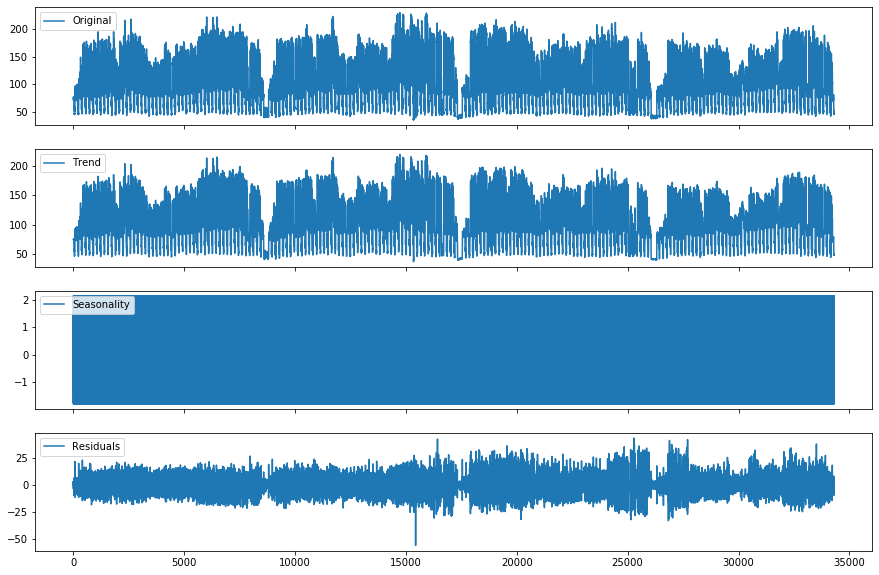

In [18]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(meter580, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(est_trend_add, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(est_seasonal_add, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(est_residual_add, label='Residuals')
axes[3].legend(loc='upper left');

#### Log Transformation

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=np.log(meter580), model='additive', freq=6)
est_trend_add = ss_decomposition.trend
est_seasonal_add = ss_decomposition.seasonal
est_residual_add = ss_decomposition.resid

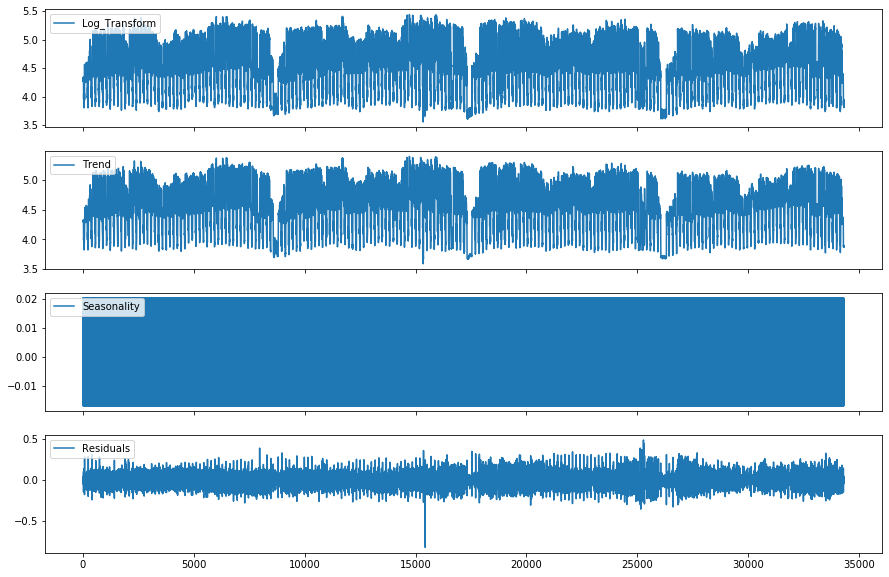

In [20]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(np.log(meter580), label='Log_Transform')
axes[0].legend(loc='upper left');

axes[1].plot(est_trend_add, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(est_seasonal_add, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(est_residual_add, label='Residuals')
axes[3].legend(loc='upper left');

#### Multiplicative Plots

In [21]:
ss_decomposition = seasonal_decompose(x=meter580, model='multiplicative', freq=6)
est_trend_mult = ss_decomposition.trend
est_seasonal_mult = ss_decomposition.seasonal
est_residual_mult = ss_decomposition.resid

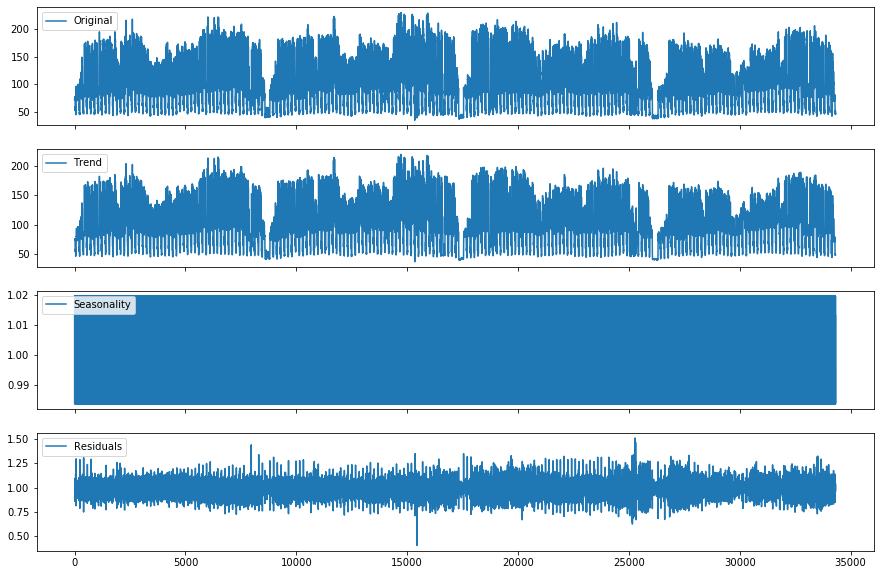

In [22]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(meter580, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(est_trend_mult, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(est_seasonal_mult, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(est_residual_mult, label='Residuals')
axes[3].legend(loc='upper left');

## Check for Stationarity

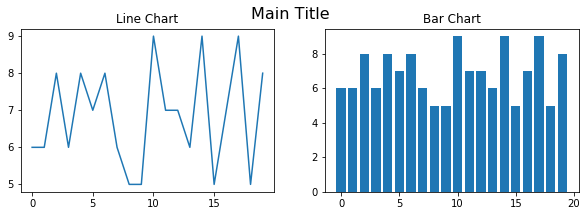

In [23]:
new_x = np.arange(20)
new_y = np.random.randint(5,10,20)

plt.figure(figsize=[10,3])

plt.suptitle('Main Title',fontsize = 16)

plt.subplot(1,2,1) # (number of rows, number of columns, number of plot)
plt.plot(new_x,new_y)
plt.title('Line Chart')

plt.subplot(1,2,2)
plt.bar(new_x,new_y)
plt.title('Bar Chart');

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
def stationarity_check(data):
    
    time_split = np.linspace(0,34320,49)
    mean_list = []
    variance_list = []

    for index, split in enumerate(time_split[1:]):
        slice1 = int(time_split[index-1])
        slice2 = int(time_split[index])
        mean_list.append([index, np.mean(data[slice1: slice2])])
        variance_list.append([index, np.var(data[slice1: slice2])])
    
    plt.figure(figsize=[15,15])
    
    plt.subplot(3,1,1)
    mean_plot = plt.plot([i[0] for i in mean_list], [i[1] for i in mean_list])
    plt.title('Monthly Mean', fontsize=20)
    plt.ylim(0)
    
    plt.subplot(3,1,2)
    variance_plot = plt.plot([i[0] for i in variance_list], [i[1] for i in variance_list])
    plt.title('Monthly Variance', fontsize=20)
    plt.ylim(0)
    
    plt.subplot(3,1,3)
    plt.title('Energy Consumption Histogram', fontsize=20)
    hist_plot = plt.hist(data, bins = 15)
    
    plt.tight_layout()
    
    adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(data)
    print("ADF: ", adf)
    print("p-value: ", pvalue)
    
    return mean_plot, variance_plot, hist_plot
    

### No Transformations

ADF:  -26.869839542293764
p-value:  0.0


([<matplotlib.lines.Line2D at 0x123acb588>],
 (array([1977., 4378., 3566., 4531., 5394., 2375., 1565., 1925., 2348.,
         2478., 1992., 1196.,  426.,  109.,   60.]),
  array([ 35.,  48.,  61.,  74.,  87., 100., 113., 126., 139., 152., 165.,
         178., 191., 204., 217., 230.]),
  <a list of 15 Patch objects>))

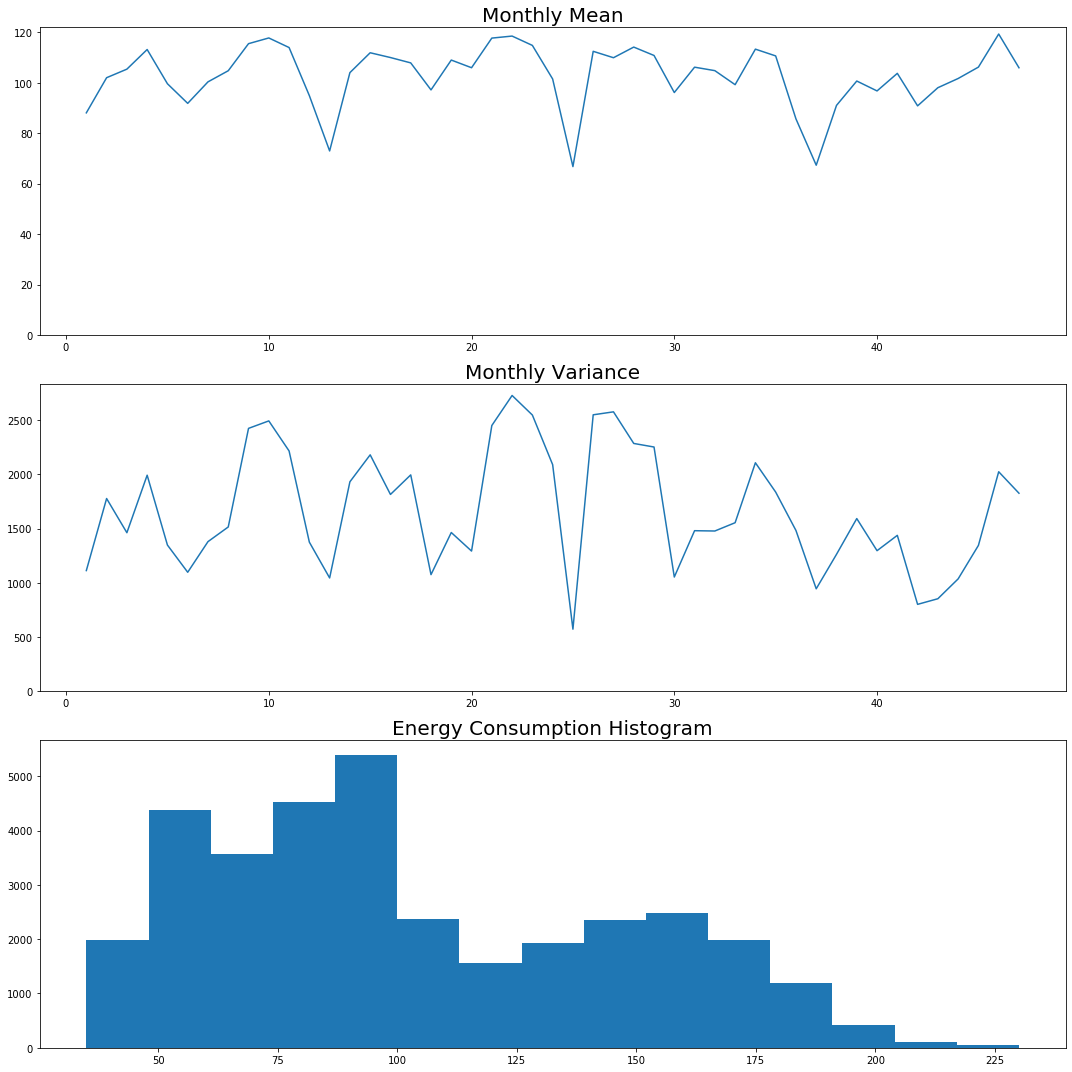

In [27]:
stationarity_check(meter580)

### Remove trend and seasonality

ADF:  -35.39680116039654
p-value:  0.0


([<matplotlib.lines.Line2D at 0x12369f828>],
 (array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         6.0000e+00, 1.3200e+02, 1.0620e+03, 6.4500e+03, 2.0867e+04,
         5.0140e+03, 6.0400e+02, 1.5800e+02, 1.8000e+01, 2.0000e+00]),
  array([-0.82052039, -0.73350699, -0.64649359, -0.55948018, -0.47246678,
         -0.38545337, -0.29843997, -0.21142657, -0.12441316, -0.03739976,
          0.04961365,  0.13662705,  0.22364045,  0.31065386,  0.39766726,
          0.48468066]),
  <a list of 15 Patch objects>))

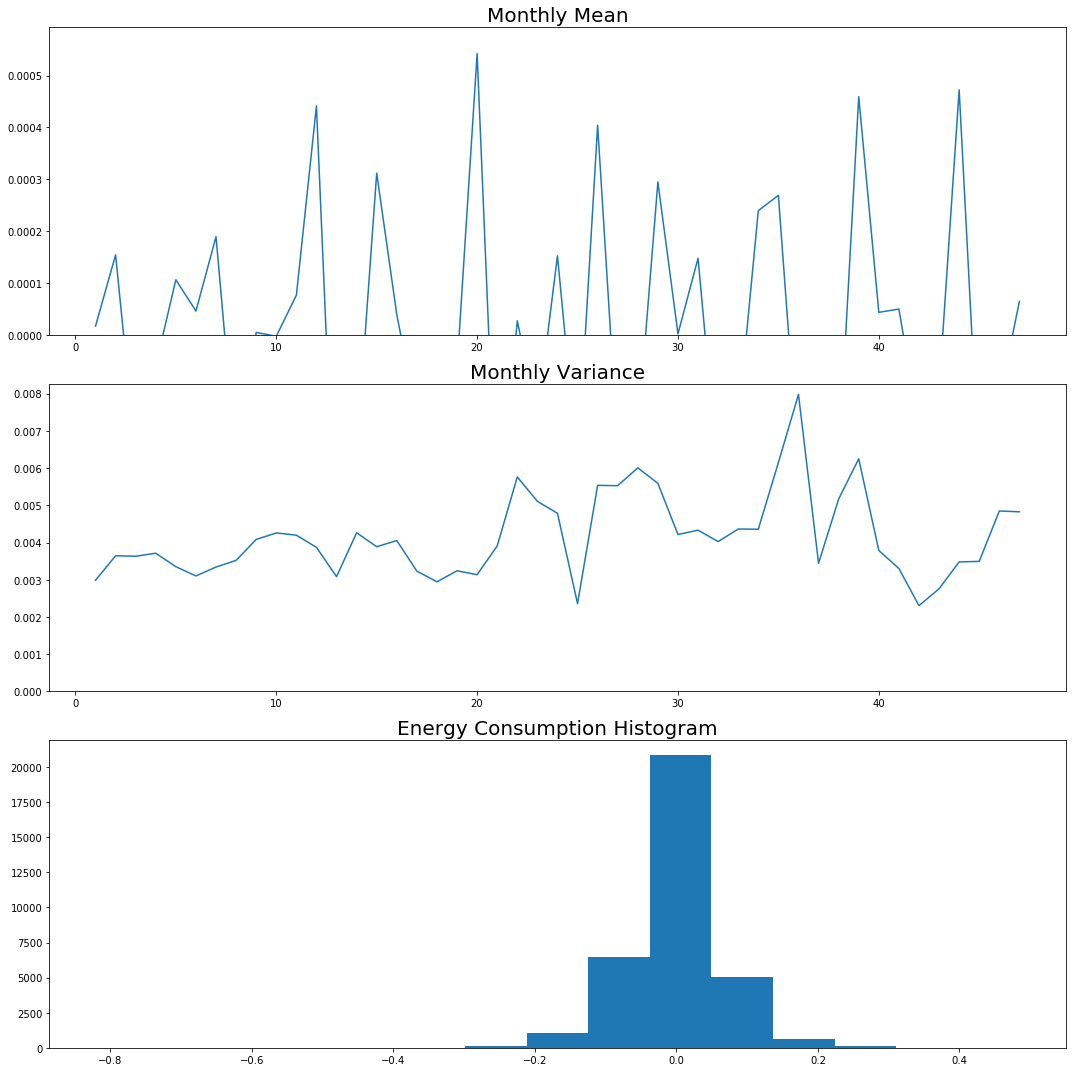

In [28]:
meter580_res_add = est_residual_add[3:-3]
stationarity_check(meter580_res_add)

### Log Transformation

ADF:  -25.984011233178666
p-value:  0.0


([<matplotlib.lines.Line2D at 0x122e79cf8>],
 (array([ 106.,  808., 2966., 1969., 2025., 2274., 3225., 5208., 3089.,
         1786., 2444., 3337., 3413., 1486.,  184.]),
  array([3.55534806, 3.68086348, 3.80637889, 3.93189431, 4.05740973,
         4.18292514, 4.30844056, 4.43395598, 4.55947139, 4.68498681,
         4.81050223, 4.93601764, 5.06153306, 5.18704848, 5.31256389,
         5.43807931]),
  <a list of 15 Patch objects>))

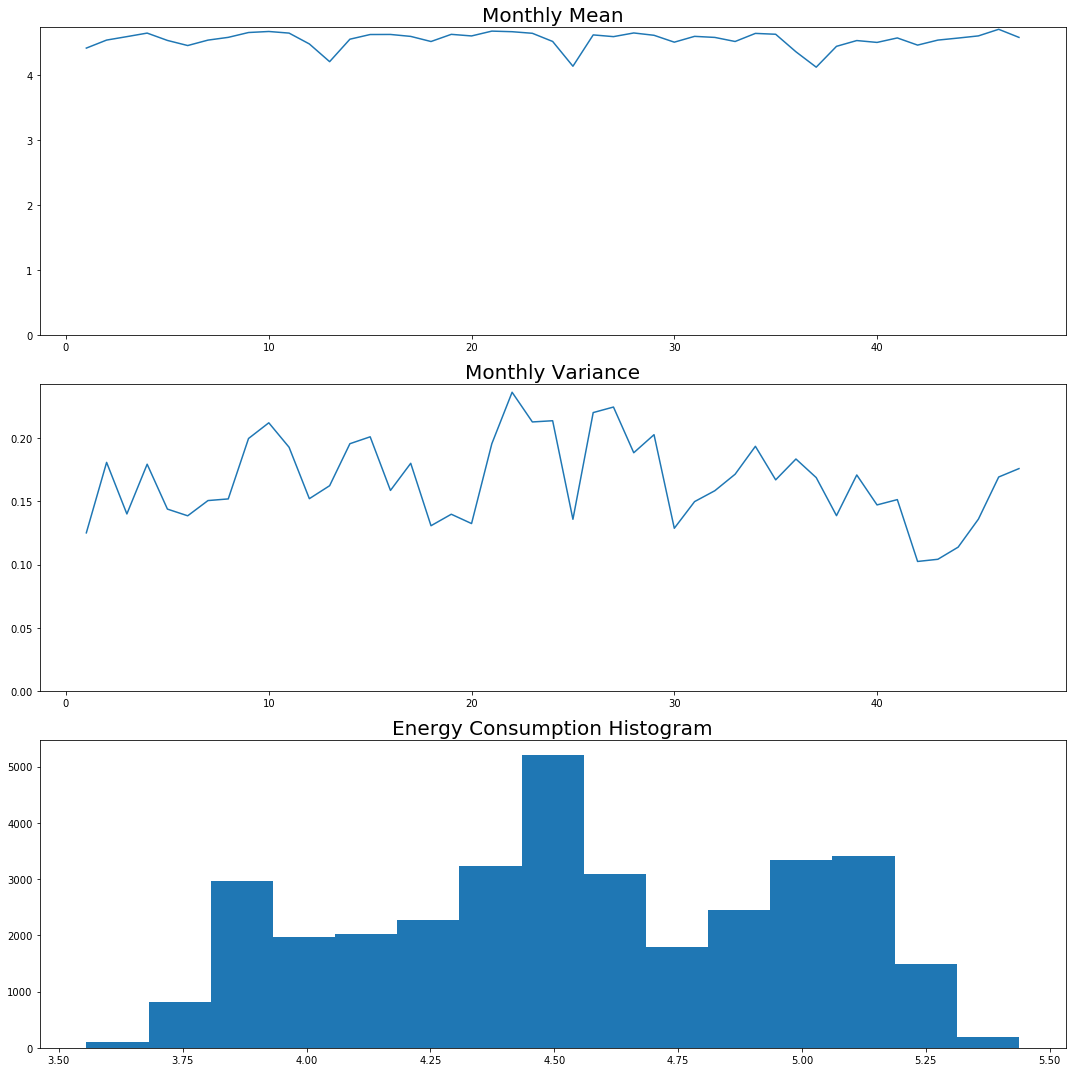

In [29]:
meter580_log = np.log(meter580)
stationarity_check(meter580_log)

### Remove Autocorrelation with Differencing

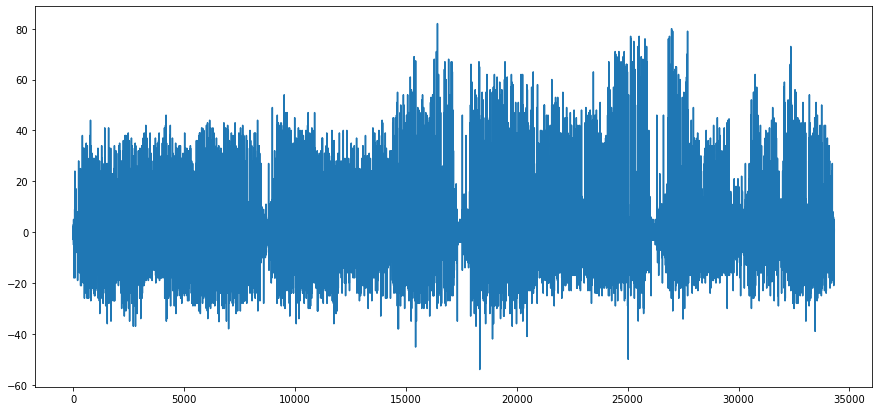

In [658]:
plt.figure(figsize=[15,7])
plt.plot(pd.Series(meter580).diff())

In [549]:
meter580_diff = meter580[:-1] - meter580[1:]

ADF:  -32.03080589235396
p-value:  0.0


([<matplotlib.lines.Line2D at 0x1d7ff73390>],
 (array([1.6000e+01, 3.9000e+01, 6.9000e+01, 1.3300e+02, 2.8700e+02,
         3.8700e+02, 6.2300e+02, 1.9000e+03, 1.0548e+04, 1.5750e+04,
         3.1420e+03, 1.1660e+03, 2.3900e+02, 1.7000e+01, 3.0000e+00]),
  array([-82.        , -72.93333333, -63.86666667, -54.8       ,
         -45.73333333, -36.66666667, -27.6       , -18.53333333,
          -9.46666667,  -0.4       ,   8.66666667,  17.73333333,
          26.8       ,  35.86666667,  44.93333333,  54.        ]),
  <a list of 15 Patch objects>))

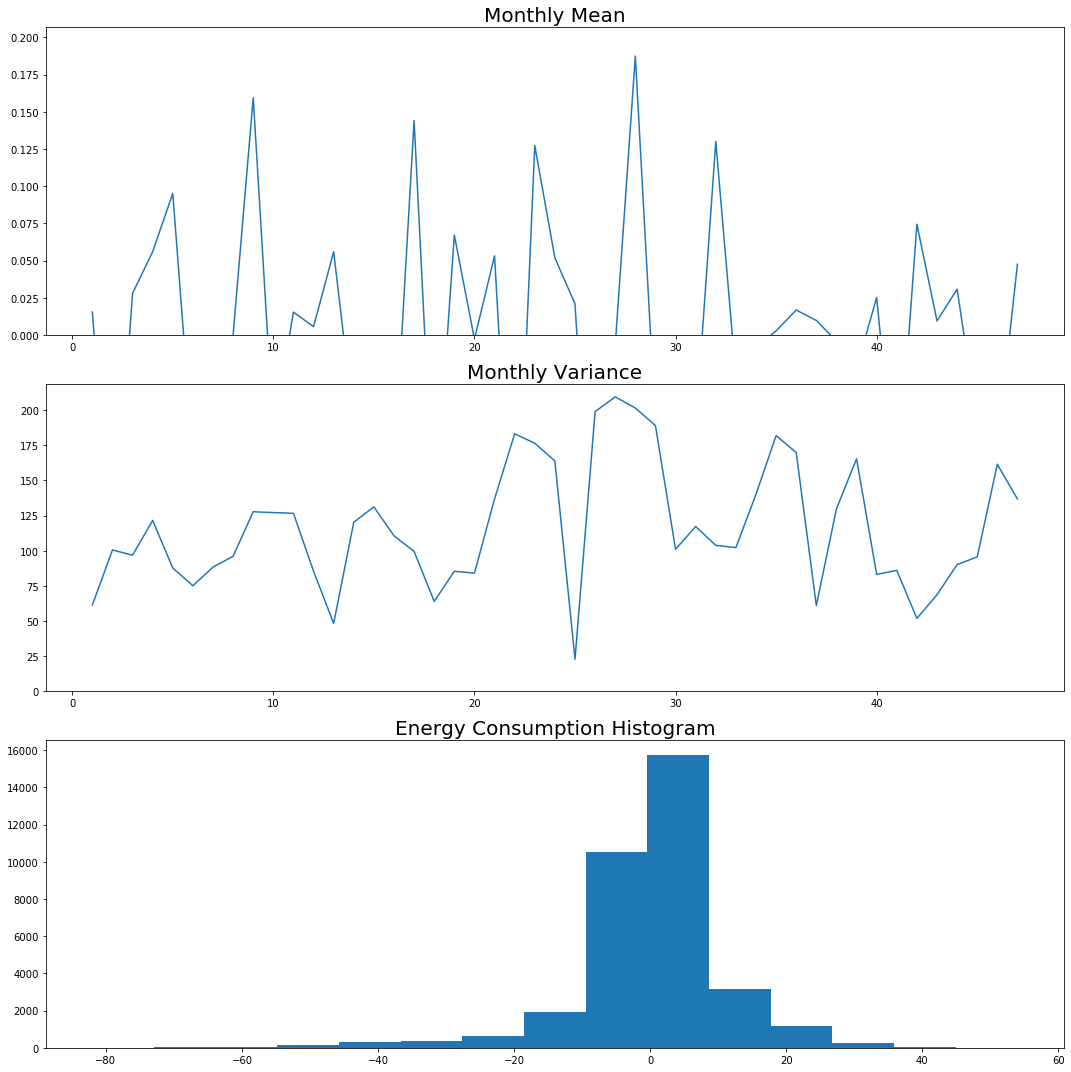

In [662]:
stationarity_check(meter580_diff)

ADF:  -32.03080589235396
p-value:  0.0


([<matplotlib.lines.Line2D at 0x1d88c90898>],
 (array([3.0000e+00, 1.7000e+01, 2.3900e+02, 1.1660e+03, 3.1420e+03,
         1.5750e+04, 1.0548e+04, 1.9000e+03, 6.2300e+02, 3.8700e+02,
         2.8700e+02, 1.3300e+02, 6.9000e+01, 3.9000e+01, 1.6000e+01]),
  array([-54.        , -44.93333333, -35.86666667, -26.8       ,
         -17.73333333,  -8.66666667,   0.4       ,   9.46666667,
          18.53333333,  27.6       ,  36.66666667,  45.73333333,
          54.8       ,  63.86666667,  72.93333333,  82.        ]),
  <a list of 15 Patch objects>))

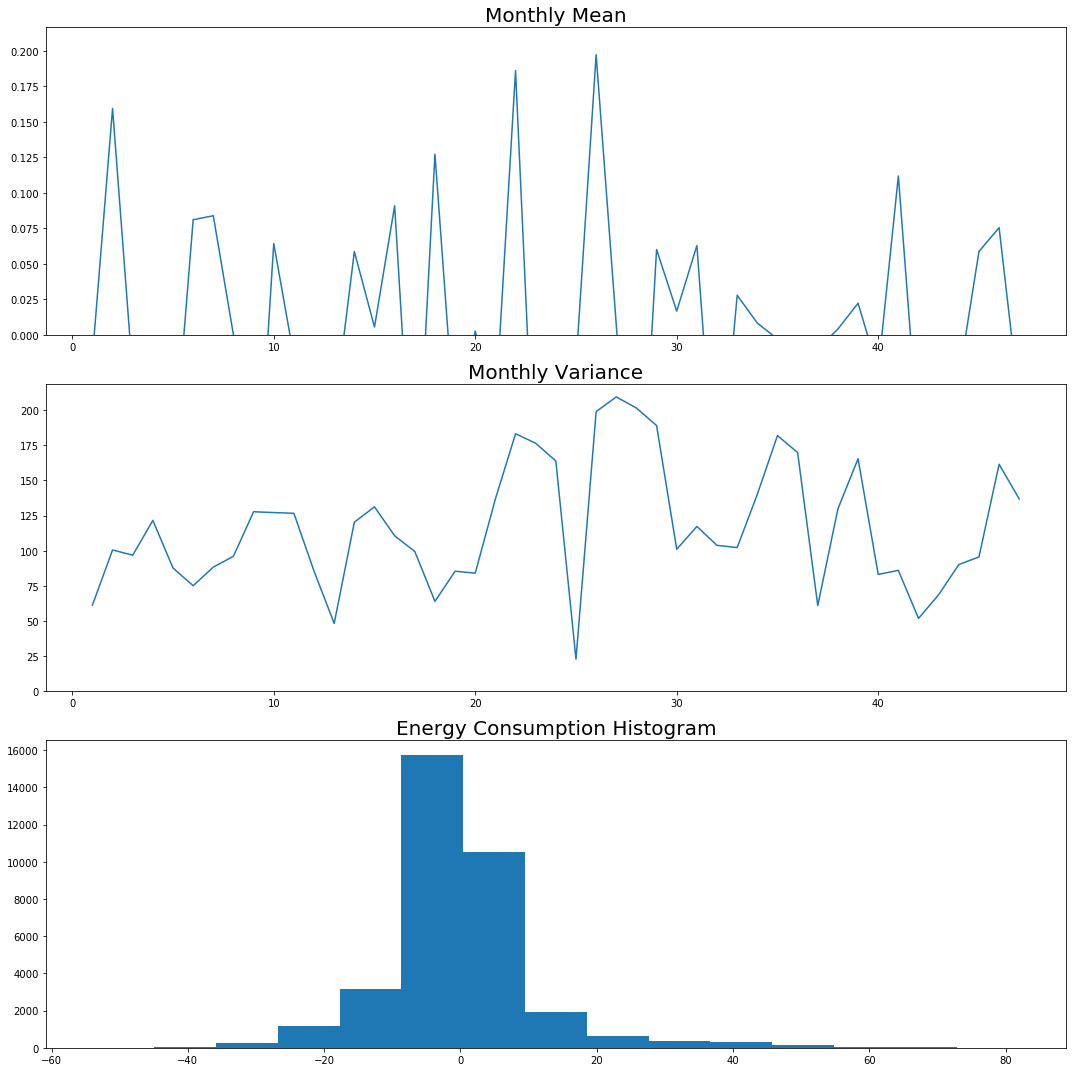

In [664]:
stationarity_check((pd.Series(meter580).diff())[1:])

---

## Smoothing

In [482]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(3))
    else:
        return cumulative_sum[window - 1:] / window

In [483]:
smoothed_meter580 = moving_average(meter580, window=3, forecast=False)

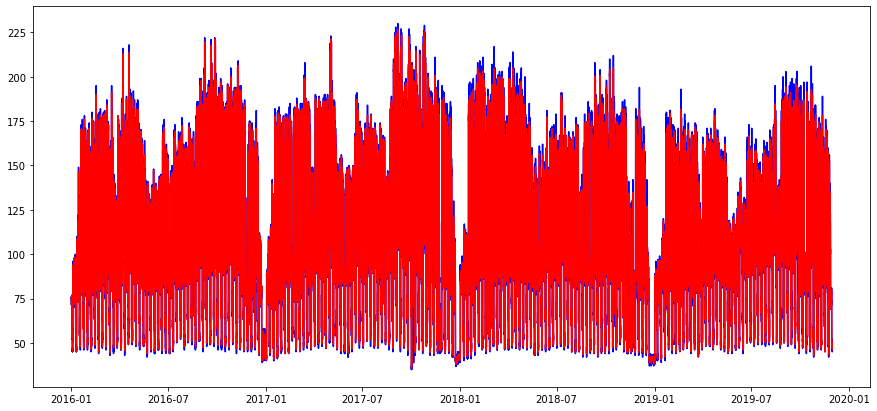

In [524]:
plt.figure(figsize=[15,7])
plt.plot(time580, meter580, 'b')
plt.plot(time580[1:-1], smoothed_meter580, 'r', label='smooth')

#### Simple Average

In [512]:
train580_df = berkeley580[berkeley580['Year'] < 2019]
test580_df = berkeley580[berkeley580['Year'] > 2018]

In [516]:
train = np.array(train580_df['meter_reading_scraped'].values)
test = np.array(test580_df['meter_reading_scraped'].values)

In [517]:
train_time = np.array(train580_df['timestamp'].values)
test_time = np.array(test580_df['timestamp'].values)

In [518]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [519]:
meter_avg = np.mean(meter580)
simple_avg_preds = np.full(shape=len(test), fill_value=meter_avg, dtype='float')
simple_mse = mse(test, simple_avg_preds)

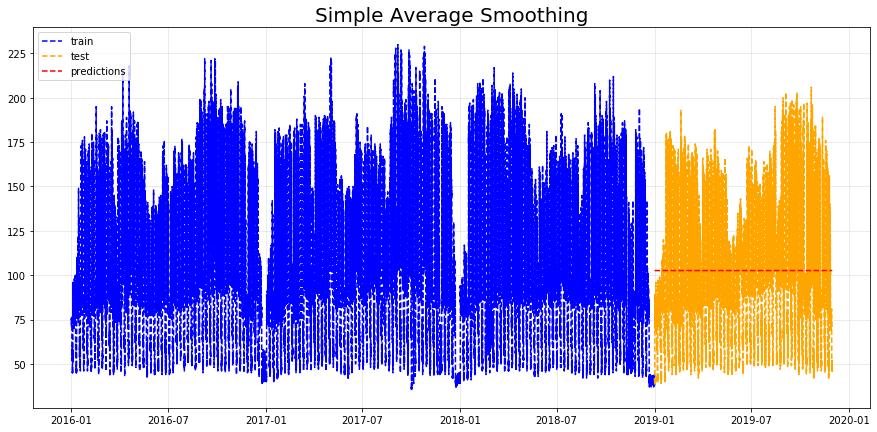

In [523]:
plt.figure(figsize=[15,7])
plt.plot(train_time, train, 'b--', label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, simple_avg_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing", fontsize = 20)
plt.grid(alpha=0.3);

#### Single Exponential

In [525]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))
single_mse = mse(test, single_preds)

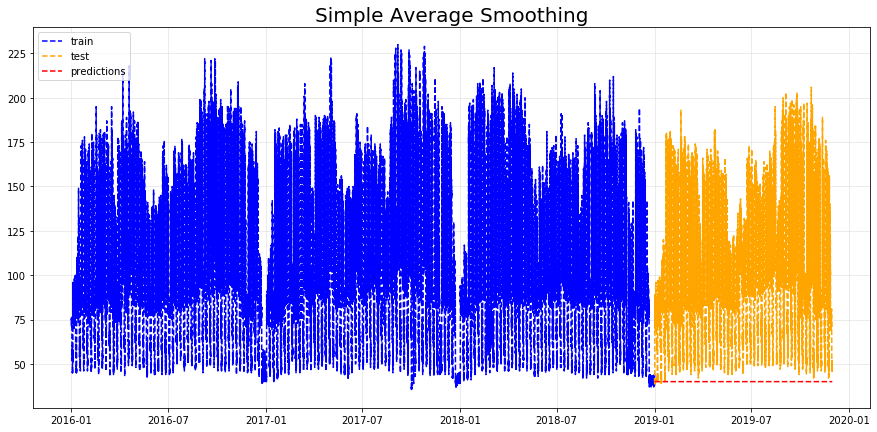

In [526]:
plt.figure(figsize=[15,7])
plt.plot(train_time, train, 'b--', label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing", fontsize = 20)
plt.grid(alpha=0.3);

#### Double Exponential

In [527]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test, double_preds)

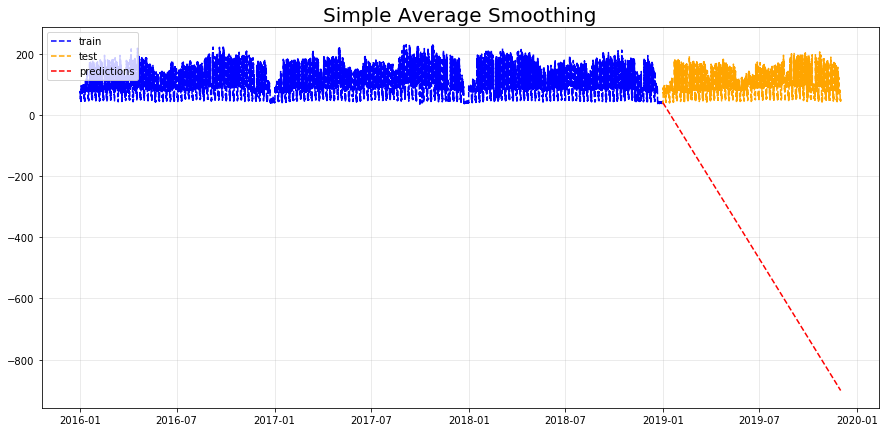

In [528]:
plt.figure(figsize=[15,7])
plt.plot(train_time, train, 'b--', label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing", fontsize = 20)
plt.grid(alpha=0.3);

#### Triple Exponential

In [533]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=4).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)

/Users/andrewgraves/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


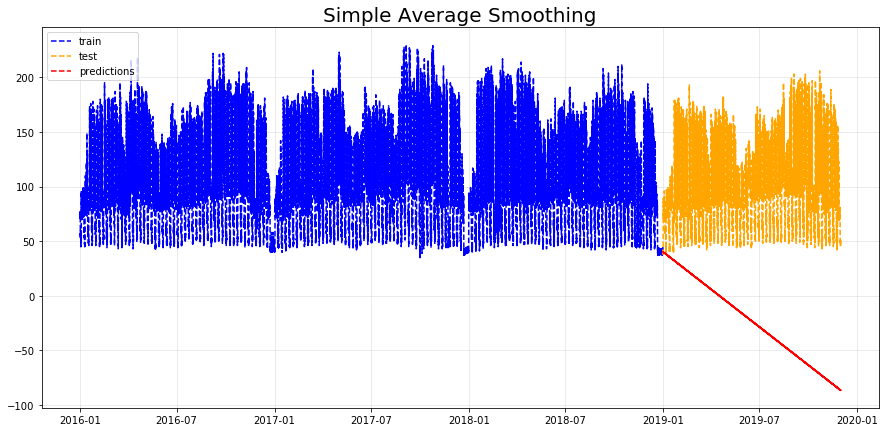

In [534]:
plt.figure(figsize=[15,7])
plt.plot(train_time, train, 'b--', label="train")
plt.plot(test_time, test, color='orange', linestyle="--", label="test")
plt.plot(test_time, triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing", fontsize = 20)
plt.grid(alpha=0.3);

---

## MA Model

In [536]:
from statsmodels.tsa.arima_model import ARMA

In [538]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-', label="actual")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.legend();

### Autocorrelation Factor

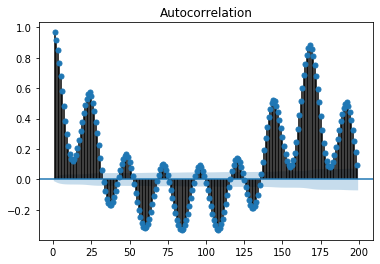

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(meter580, lags=range(1,200), alpha=0.05)

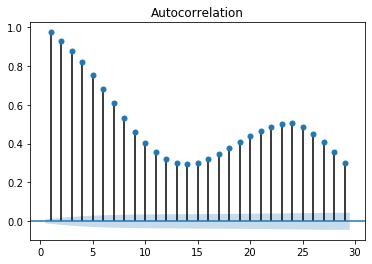

In [19]:
fig = plot_acf(meter580_log, lags=range(1,30), alpha=0.05)

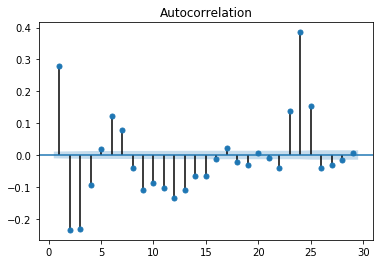

In [636]:
fig = plot_acf(meter580_res_add, lags=range(1,30), alpha=0.05)

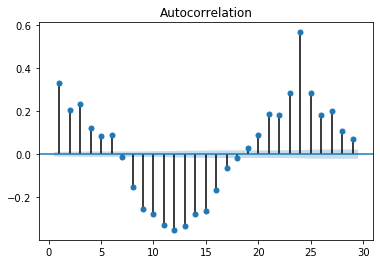

In [603]:
fig = plot_acf(meter580_diff, lags=range(1,30), alpha=0.05)

## AR Model

### Partial Autocorrelation Factor

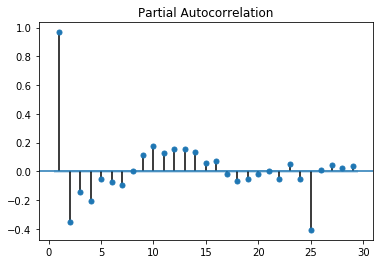

In [596]:
from statsmodels.graphics.tsaplots import plot_pacf

fig = plot_pacf(meter580, lags=range(1,30), alpha=0.05)

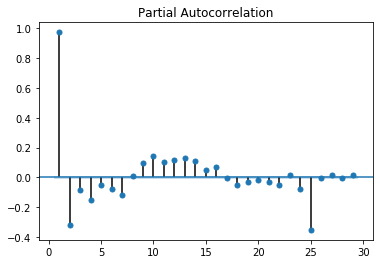

In [597]:
fig = plot_pacf(meter580_log, lags=range(1,30), alpha=0.05)

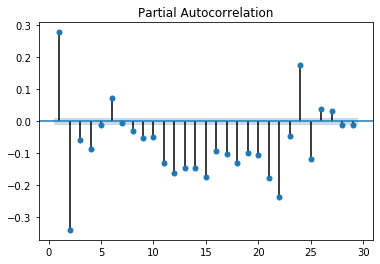

In [637]:
fig = plot_pacf(meter580_res_add, lags=range(1,30), alpha=0.05)

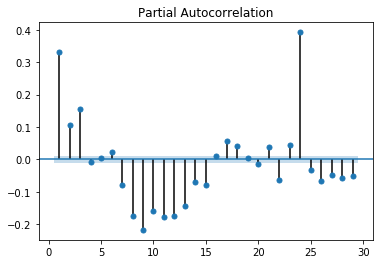

In [599]:
fig = plot_pacf(meter580_diff, lags=range(1,30), alpha=0.05)

## ARMA Model

In [618]:
len(meter580_res_mult)

34314

In [620]:
len(time580[3:-3])

34314

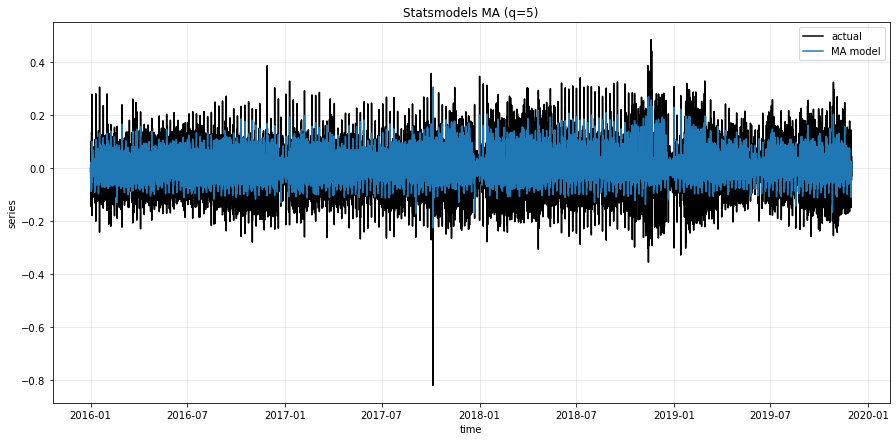

In [641]:
model = ARMA(meter580_res_add, (1,2)).fit()
plt.figure(figsize=[15,7])
run_sequence_plot(time580[3:-3], meter580_res_add, title="Statsmodels MA (q={})".format(i))
plt.plot(time580[3:-3], model.predict(start=3, end=len(time580)-4), label="MA model")
plt.legend()
plt.show();

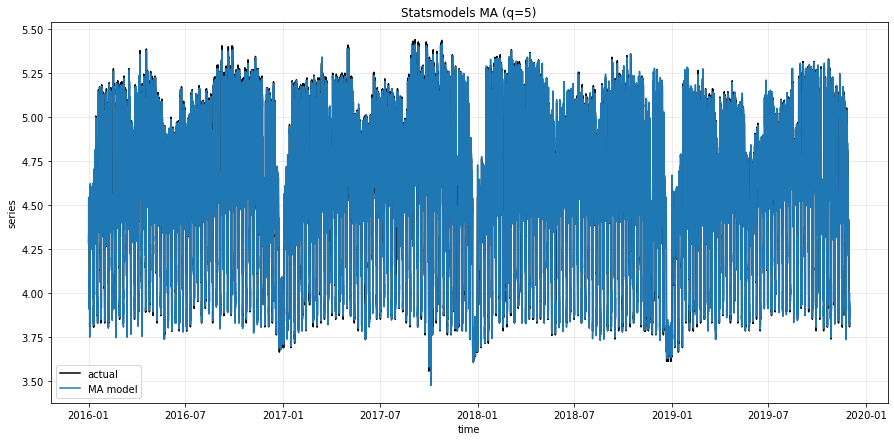

In [628]:
model = ARMA(meter580_log, (1,1)).fit()
plt.figure(figsize=[15,7])
run_sequence_plot(time580, meter580_log, title="Statsmodels MA (q={})".format(i))
plt.plot(time580, model.predict(start=0, end=len(time580)-1), label="MA model")
plt.legend()
plt.show();

---

#### Group berkeley_df by timestamp and date, summing up meter readings

In [313]:
berkeley_group = berkeley_df.groupby(['timestamp', 'Date']).agg({'meter_reading_scraped': 'sum'}).reset_index()

In [314]:
berkeley_group_date = berkeley_group.groupby('Date').agg({'meter_reading_scraped': 'sum'}).reset_index()

In [315]:
berkeley_group_date

,Date,meter_reading_scraped
0,2016-01-01,274880.630456
1,2016-01-02,271785.029025
2,2016-01-03,291140.067226
3,2016-01-04,320489.110664
4,2016-01-05,323992.383936
...,...,...
1425,2019-11-26,323143.648186
1426,2019-11-27,304514.618980
1427,2019-11-28,282670.764634
1428,2019-11-29,286811.986609


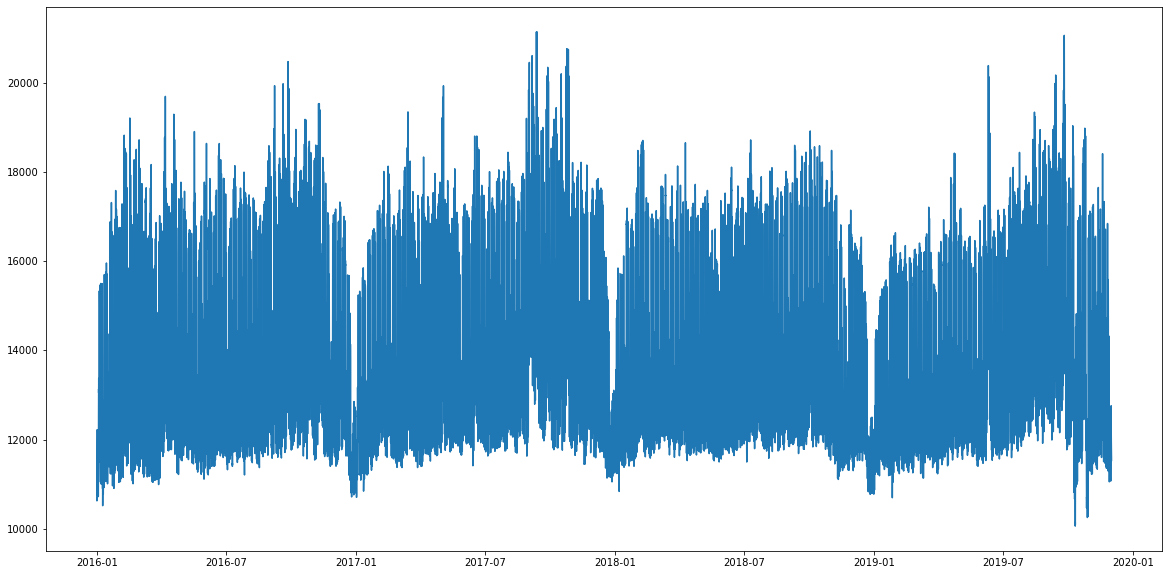

In [317]:
plt.figure(figsize=(20,10))

plt.plot(berkeley_group['timestamp'], berkeley_group['meter_reading_scraped'])